## Data Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Read the CSV file.

In [2]:
data = pd.read_csv("uncleandata.csv")

Check the number of rows and columns.

In [3]:
rows, columns= data.shape
print("No. of Rows: {} \nNo.of Columns: {}". format(rows,columns))

No. of Rows: 15099 
No.of Columns: 11


Get the list of features.

In [4]:
features = list(data[(data.columns.difference(['left']))])

features

['average_montly_hours',
 'department',
 'is_smoker',
 'last_evaluation',
 'number_project',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company',
 'work_accident']

Total data with duplicate instances.

In [5]:
data.duplicated(keep=False).sum()

5085

Duplicate data remaining after keeping the first instance of data.

In [6]:
data.duplicated().sum()

2840

Remove all the duplicates except the first instance of the duplicate data.

In [7]:
data.drop_duplicates(inplace= True)

Making sure there are no duplicates.

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(12259, 11)

Checking the maximum and minimum values of features that can be helpful to get cleaner histogram by using bins in relation to the min and max.

In [10]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
work_accident                    1
left                           yes
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [11]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
work_accident               0
left                       no
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

Now plotting the data in the histogram.
Plotting each feature with integer or float values to get better understanding of the data.
Plotting average_montly_hours seperately and rest of the data together. 

Text(0.5, 1.0, 'Average Monthly Hours')

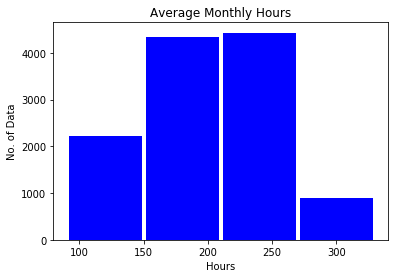

In [12]:
hours= data['average_montly_hours']
plt.hist(hours, rwidth=0.95, bins = [90,150,210,270,330], color= ['blue'], label = 'Average Monthly Hours')
plt.xlabel("Hours")
plt.ylabel("No. of Data")
plt.title("Average Monthly Hours")

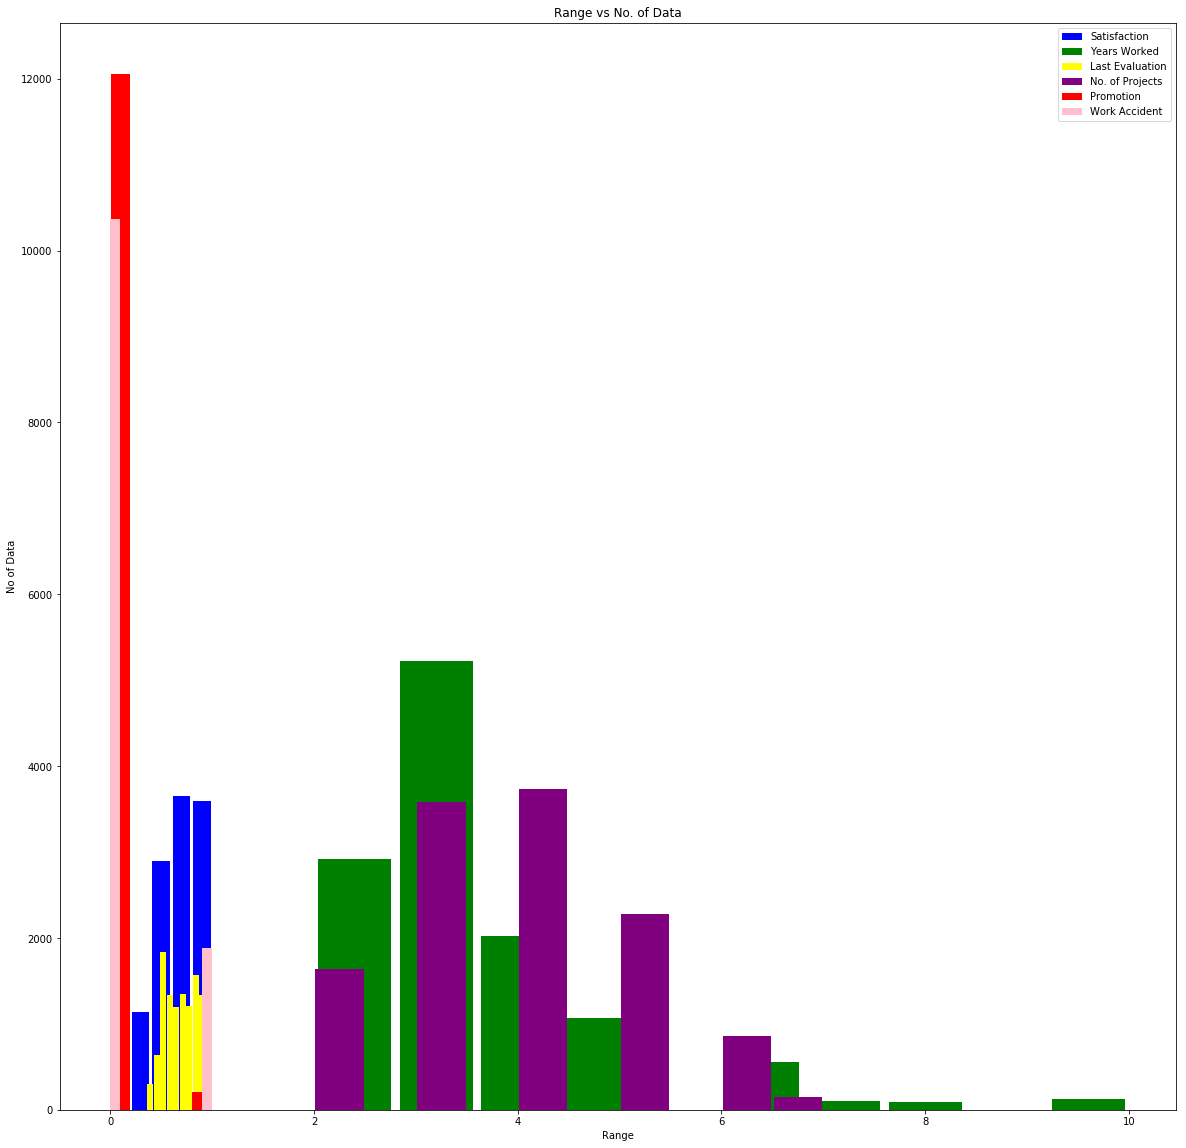

In [13]:
#Ignore the warning related to NaN values
np.warnings.filterwarnings('ignore')

#Setting the size of the histogram
plt.figure(figsize=(20,20))

#Plotting the data into a histogram.
plt.hist(data['satisfaction_level'], rwidth=0.85,bins= [0,0.2,0.4,0.6,0.8,1],color= ['blue'], label = 'Satisfaction')
plt.hist(data['time_spend_company'],  rwidth=0.90, color= ['green'], label= 'Years Worked')
plt.hist(data['last_evaluation'], rwidth=0.90, color= ['yellow'], label = 'Last Evaluation')
plt.hist(data['number_project'], rwidth=0.95, color= ['Purple'], label = 'No. of Projects')
plt.hist(data['promotion_last_5years'], rwidth=0.95, bins= [0,0.2,0.4,0.6,0.8,1], color= ['Red'], label = 'Promotion')
plt.hist(data['work_accident'], rwidth=0.95, color= ['Pink'], label = 'Work Accident')
plt.xlabel("Range")
plt.ylabel("No of Data")
plt.title("Range vs No. of Data")

plt.legend()
plt.show()


Finding the sum of missing values.

In [14]:
data.isnull().values.sum()

12542

Checking which feature has how much missing values.

In [15]:
data.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         150
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                12024
department                   0
salary                       0
dtype: int64

Dropping the feature with significant missing values. 

In [16]:
data.drop(columns=['is_smoker'], inplace = True)

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,sales,low


Filling the missing values with the mean value of data of given feature.

In [18]:
mean = data.mean().round(2)
data= data.fillna(mean)

Veryfing that ther are no missing values.

In [19]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Changing the value of feature left with 1 for yes and 0 for no.

In [20]:
data.replace(['yes', 'no'],[1,0], inplace=True)

Making sure the changes has been done.

In [21]:
data.left

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14135    0
14139    0
14140    0
14170    0
14171    0
14172    0
14259    1
14359    1
14361    1
14367    1
14382    1
14389    1
14444    1
14478    1
14665    1
14673    1
14687    1
14698    1
14928    1
14936    1
14943    1
14949    1
14956    1
14966    1
14967    1
14968    1
14969    1
14990    1
14993    1
14995    1
Name: left, Length: 12259, dtype: int64

What else can we do?

In [22]:
data['left'].value_counts()

0    10144
1     2115
Name: left, dtype: int64

In [23]:
#Relation between salary and an employee leaving the company.
def f(x):    
    if x['left']==1 and x['salary']=='high':
        return 'Left with high salary'
    elif x['left']==1 and x['salary']=='medium':
        return 'Left with medium salary'
    elif x['left']==1 and x['salary']=='low':
        return "Left with low"
    else:
        return "Stayed"


salary_relation = data.apply(f, axis=1)

Getting the number of people who left in relation to the salary.

In [24]:
salary_relation.value_counts()

Stayed                     10144
Left with low               1251
Left with medium salary      812
Left with high salary         52
dtype: int64

Checking relation between work accidents and people leaving company.

In [25]:
data['work_accident'].value_counts()

0    10372
1     1887
Name: work_accident, dtype: int64

In [26]:
def f(x):    
   return 'left' if x['left']==1 and x['work_accident']==1 else 'stayed'

accident = data.apply(f, axis=1)

In [27]:
accident.value_counts()

stayed    12147
left        112
dtype: int64

Checking the number of people promoted.

In [28]:

data['promotion_last_5years'].value_counts()

0    12052
1      207
Name: promotion_last_5years, dtype: int64

Finding whether the people who were promoted  stayed or left.

In [29]:

def f(x):    
   return 'stayed' if x['left']==0 and x['promotion_last_5years']==1 else 'left'

promotion = data.apply(f, axis=1)

In [30]:
promotion.value_counts()

left      12061
stayed      198
dtype: int64

Checking for outlier for features that looks like having an outlier from just  looking at the histogram.

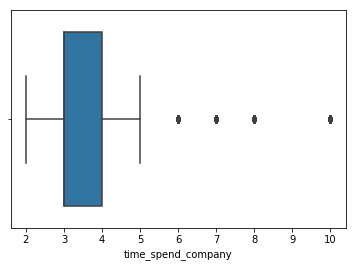

In [31]:

sns.boxplot(x=data['time_spend_company'])

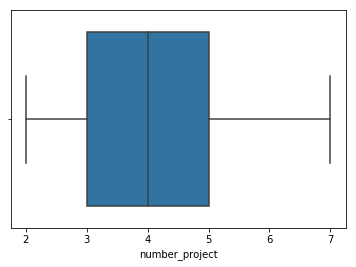

In [32]:
sns.boxplot(x=data['number_project'])

Finding whether the outliers stayed or left.

In [33]:
#This is rough estimate based on the boxplot of time_spend_company
def f(x):    
   return 'stayed outliers' if x['left']==0 and x['time_spend_company']>5  else 'left'

out = data.apply(f, axis=1)
out.value_counts()

left               11506
stayed outliers      753
dtype: int64

Finding the total number of outliers. 

In [34]:
Q1 = data['time_spend_company'].quantile(0.25)
Q3 = data['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
outlier =(data['time_spend_company'] < (Q1 - 1.5 * IQR)) |(data['time_spend_company'] > (Q3 + 1.5 * IQR))
outlier.value_counts()

False    11393
True       866
Name: time_spend_company, dtype: int64

In [35]:
outlier.value_counts()

False    11393
True       866
Name: time_spend_company, dtype: int64

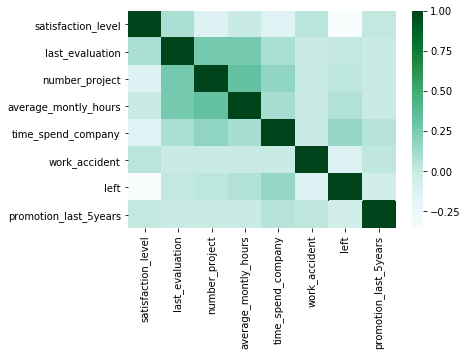

In [36]:
# plot the heatmap for correlation
sns.heatmap(data.corr(), cmap= 'BuGn')

In [38]:
data.to_csv("cleandata.csv", index=False)